# Data Mining Project Deliverables
# Part 1: Data Pre-Processing


In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pylab as plt
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(50)

## 1. Importing Data

In [2]:
# fetch dataset 
project = fetch_ucirepo(id=2) 
# data (as pandas dataframes) 
X =project.data.features 
y= project.data.targets 

# Combine into a single dataframe
project_df =pd.concat([X, y], axis=1)

In [3]:
project_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Since this dataset is old and has been collected in 1994 in order to make use of this dataset in recent times we need to add another column called income_2024 column where using the inflation rate for US we are going to calculate the equivalent amount of 50k per year in 1994 to the per annum income in 2024. We can do this by appending the new income_2024 column to this dataset. According to U.S. Bureau of Labor Statistics the cumulative inflation from 1994 to 2024 was 107.68% which accounts for average inflation rate per year as 3.07% (this was based on Consumer Price Index).

In [71]:
averageg_inflation_rate_per_year = 0.0307
diff_years= 2024 - 1994
avgincome_2024 =50000*(1+0.0307)**diff_years
round(avgincome_2024)

123862

    With average inflation rate of 3.07%/year, we have calculacted the then $50K in 1994 will be equal to $124K

For simpler seperation, we are making the income into two simple categories(<124k or >124k)

In [4]:
project_df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [5]:
project_df['income'] = project_df['income'].str.replace('<=50K.', '<=50K', regex=True).str.replace('>50K.', '>50K', regex=True)

In [6]:
def modified_income(income):
    if income =='>50K':
        return'>124K'
    elif income== '<=50K':
        return'<=124K'
    else:
        return income

project_df['income_2024']=project_df['income'].apply(modified_income)

project_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_2024
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=124K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=124K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=124K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=124K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=124K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,<=124K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,<=124K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,>124K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,>124K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,>124K


In [7]:
project_df['income_2024'].unique()

array(['<=124K', '>124K'], dtype=object)

In [9]:
# Count the number of occurrences of 0 in the 'INCOME_2024' column
num_zeros = (project_df['income_2024'] == 0).sum()

# Print the number of zeros
print(f"Number of zeros in 'income_2024': {num_zeros}")

Number of zeros in 'income_2024': 0


In [10]:
# drop income column as INCOME_2024 is added
project_df.drop('income',axis=1,inplace=True)

In [11]:
project_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_2024
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=124K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=124K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=124K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=124K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=124K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=124K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=124K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>124K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>124K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>124K


## 2. Dataset Exploration


In [12]:
project_df.shape
#Store rows & columns in corresponding variables variables
rows= project_df.shape[0]
cols=project_df.shape[1]
print(f"No of Rows= {rows}\nNo of Colums = {cols}")

No of Rows= 48842
No of Colums = 15


In [13]:
project_df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_2024'],
      dtype='object')

## 3. Adjusting Column Names

In [14]:
project_df.columns = project_df.columns.str.upper()

In [15]:
project_df.columns=[s.strip().replace('-', '_') for s in project_df.columns]
project_df.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION_NUM',
       'MARITAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS_PER_WEEK', 'NATIVE_COUNTRY',
       'INCOME_2024'],
      dtype='object')

Identification and Summarizing the Outliers for Each Feature (Income Split)

In [16]:
cont_feature_col = ['AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS_PER_WEEK']

# Set up a dictionary data structure to hold feature information.
outliers = {
    'Name of the Column': [], 'Total Outliers': [],
    'Percentage Outliers': [],'Median': [],
    'Mean': [], 'IQR': []
}

Income_1_df=project_df[project_df['INCOME_2024']=='<=124K']
Income_2_df=project_df[project_df['INCOME_2024']=='>124K']

for df, income_category in zip([Income_1_df, Income_2_df], ['<=124K', '>124K']):

    for col in cont_feature_col:
        # Calculation of IQR for columns
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR = q3 - q1

        # Detect outliers
        outliers_1=np.logical_or((df[col]<(q1-1.5*IQR)),(df[col] > (q3+1.5* IQR)))

        # Calc no of outliers and the percentage
        outliers_total = outliers_1.sum()
        percentage_outliers = (outliers_total / len(df))* 100

        # Calculate the median, mean, and IQR
        median = df[col].median()
        mean = df[col].mean()

        # Add the information to the dictionary
        outliers['Name of the Column'].append(f"{col} ({income_category})")
        outliers['Total Outliers'].append(outliers_total)
        outliers['Percentage Outliers'].append(percentage_outliers)
        outliers['Median'].append(median)
        outliers['Mean'].append(mean)
        outliers['IQR'].append(IQR)

# Create a DataFrame to summarize the outliers
outlier_df = pd.DataFrame(outliers)

# Display the DataFrame
outlier_df

,Name of the Column,Total Outliers,Percentage Outliers,Median,Mean,IQR
0,AGE (<=124K),207,0.557126,34.0,36.872184,21.0
1,FNLWGT (<=124K),1089,2.930965,178811.0,190039.565523,121707.0
2,EDUCATION_NUM (<=124K),12911,34.749024,9.0,9.598493,1.0
3,CAPITAL_GAIN (<=124K),1544,4.155565,0.0,147.010308,0.0
4,CAPITAL_LOSS (<=124K),1138,3.062845,0.0,54.151931,0.0
5,HOURS_PER_WEEK (<=124K),11706,31.505854,40.0,38.840048,5.0
6,AGE (>124K),90,0.770086,43.0,44.275178,15.0
7,FNLWGT (>124K),362,3.097459,176729.0,188470.574570,114562.5
8,EDUCATION_NUM (>124K),139,1.189356,12.0,11.602807,3.0
9,CAPITAL_GAIN (>124K),2491,21.314281,0.0,4042.239497,0.0


In [18]:
percent_data={}
categ_percent=project_df['RACE'].value_counts(normalize=True)* 100
percent_data['RACE'] =categ_percent
percentage_df=pd.DataFrame(percent_data)
percentage_df

,RACE
White,85.504279
Black,9.592154
Asian-Pac-Islander,3.110028
Amer-Indian-Eskimo,0.962287
Other,0.831252


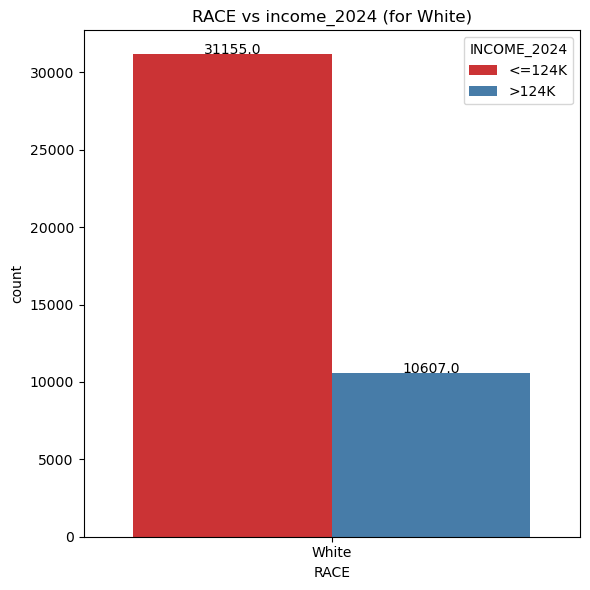

In [19]:
data_usa=project_df[project_df['RACE']=='White']

# Set a color palette for the plot
sns.set_palette("Set1")
# Create a figure and axes
plt.figure(figsize=(6, 6))
ax =sns.countplot( x='RACE',hue='INCOME_2024',data= data_usa)
plt.title('RACE vs income_2024 (for White)')

# Annotate the bars with their heights
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

In [20]:
percent_data={}
categ_percent= project_df['SEX'].value_counts(normalize=True)*100
percent_data['SEX']=categ_percent
percentage_df= pd.DataFrame(percent_data)
percentage_df

,SEX
Male,66.848204
Female,33.151796


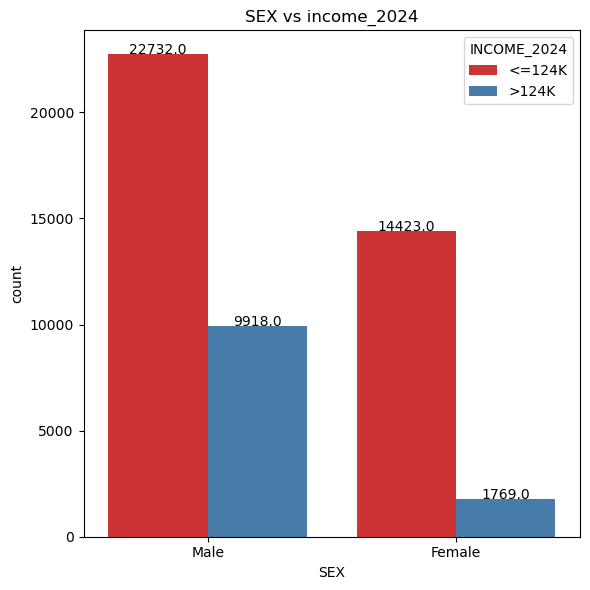

In [21]:
#color palette for the plot
sns.set_palette("Set1")
# Create a figure and axes
plt.figure(figsize=(6, 6))
ax=sns.countplot(x='SEX',hue='INCOME_2024',data=project_df)
plt.title('SEX vs income_2024')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='baseline')

plt.tight_layout()
plt.show()

In [22]:
percentage_data = {}
category_percentages = project_df['OCCUPATION'].value_counts(normalize=True) * 100
percentage_data['OCCUPATION'] = category_percentages
percentage_df = pd.DataFrame(percentage_data)
percentage_df.head(10)

,OCCUPATION
Prof-specialty,12.891637
Craft-repair,12.766313
Exec-managerial,12.712006
Adm-clerical,11.719860
Sales,11.496366
Other-service,10.282814
Machine-op-inspct,6.312140
Transport-moving,4.918957
Handlers-cleaners,4.327847
?,3.849528


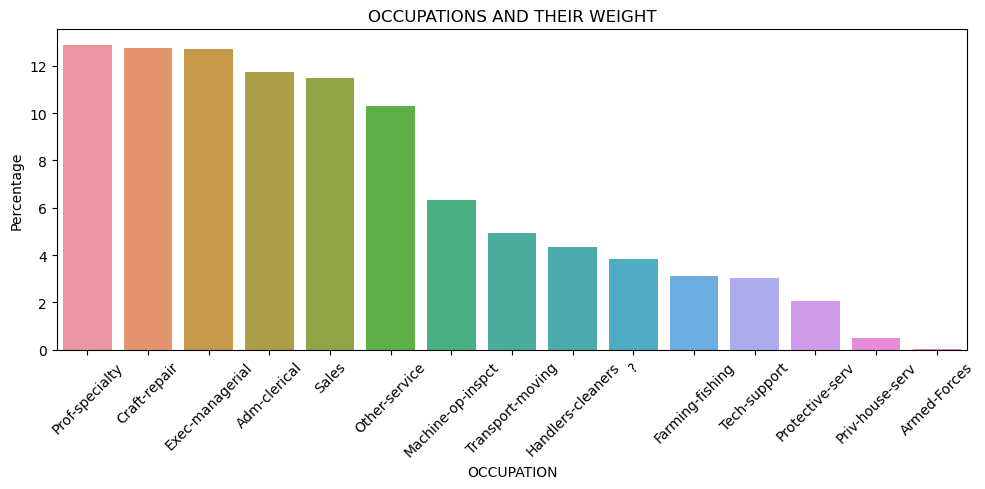

In [23]:
percent_data={}
categ_percent=project_df['OCCUPATION'].value_counts(normalize=True)*100
percent_data['OCCUPATION']=categ_percent
percentage_df=pd.DataFrame(percent_data)
percentage_df.head(10)


# Calculate the percentage of each category within the 'OCCUPATION' column
categ_percent = project_df['OCCUPATION'].value_counts(normalize=True) * 100
# Create a DataFrame with the occupations and their percentages
df=pd.DataFrame({'OCCUPATION':categ_percent.index,'Percentage':categ_percent.values})

plt.figure(figsize=(10,5))  
sns.barplot(x='OCCUPATION',y='Percentage',data=df)
plt.title('OCCUPATIONS AND THEIR WEIGHT')
plt.xticks(rotation=45) 

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
percent_data={}
categ_percent= project_df['MARITAL_STATUS'].value_counts(normalize=True) * 100
percent_data['MARITAL_STATUS']=categ_percent
percentage_df= pd.DataFrame(percent_data)
percentage_df.head()

,MARITAL_STATUS
Married-civ-spouse,45.819172
Never-married,32.998239
Divorced,13.580525
Separated,3.132550
Widowed,3.107981


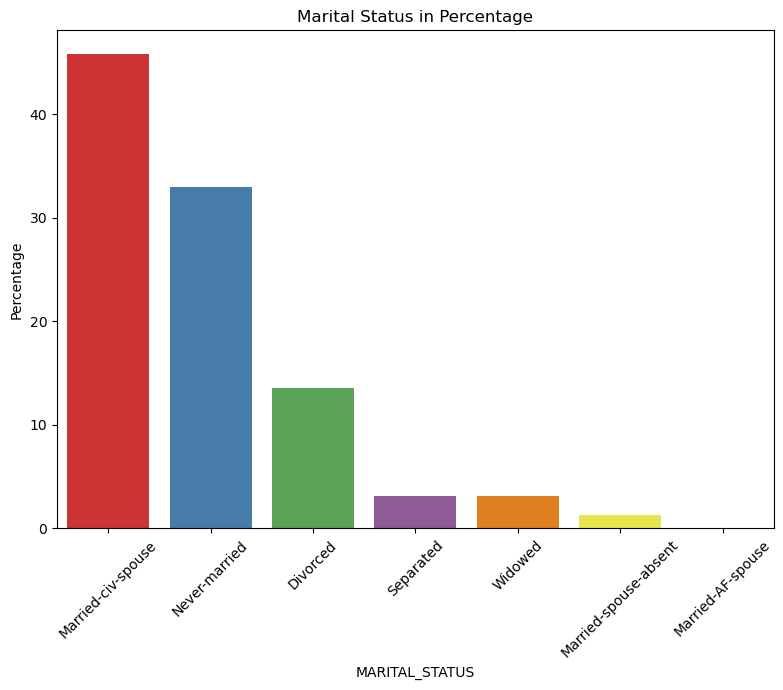

In [25]:
# Calculate each category within the 'OCCUPATION' 
categ_percent = project_df['MARITAL_STATUS'].value_counts(normalize=True) * 100
# Create a DataFrame with the occupations and their percentages
df=pd.DataFrame({'MARITAL_STATUS':categ_percent.index,'Percentage':categ_percent.values})

plt.figure(figsize=(8,7))  
sns.barplot(x='MARITAL_STATUS',y='Percentage',data=df)
plt.title('Marital Status in Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:
percent_data={}
categ_percent=project_df['NATIVE_COUNTRY'].value_counts(normalize=True) * 100
percent_data['NATIVE_COUNTRY']=categ_percent
percentage_df=pd.DataFrame(percent_data)
percentage_df.head(5)

,NATIVE_COUNTRY
United-States,90.248723
Mexico,1.958079
?,1.200379
Philippines,0.607396
Germany,0.424148


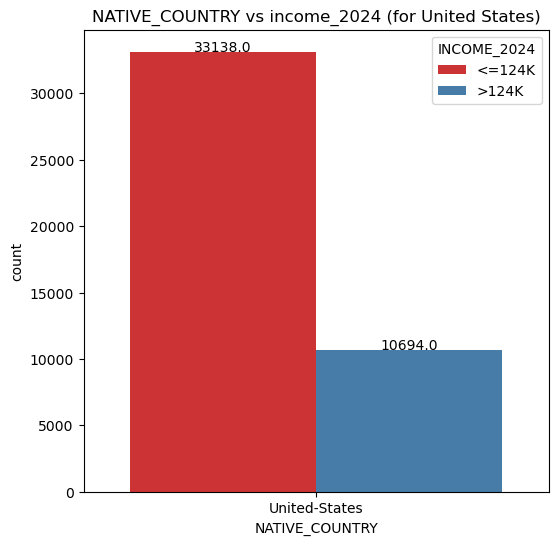

In [27]:
data_usa=project_df[project_df['NATIVE_COUNTRY']=='United-States']

sns.set_palette("Set1")

plt.figure(figsize=(6, 6))
ax=sns.countplot(x='NATIVE_COUNTRY',hue='INCOME_2024',data=data_usa)
plt.title('NATIVE_COUNTRY vs income_2024 (for United States)')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

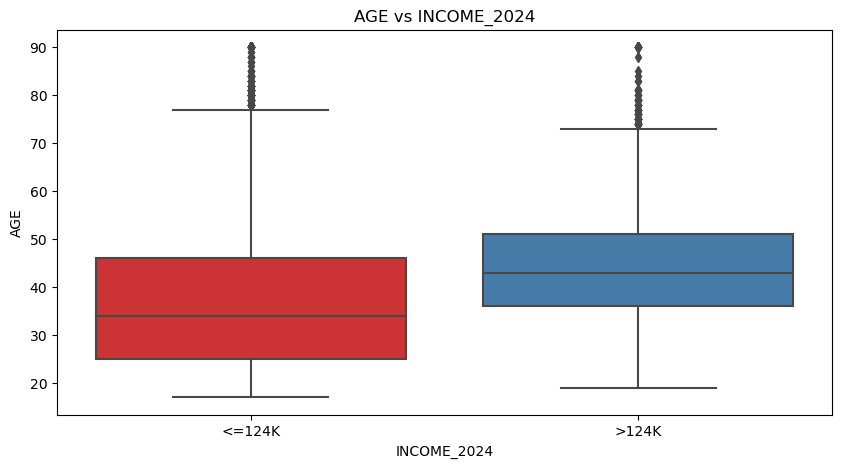

array(['<=124K', '>124K'], dtype=object)

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='INCOME_2024',y='AGE',data=project_df)
plt.title(f'AGE vs INCOME_2024')
plt.show()
project_df['INCOME_2024'].unique()

## 4. Drop Unnecessary Columns

In [29]:
countrywise = project_df['NATIVE_COUNTRY'].value_counts()
countrywise

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Dropping the columns which are not required

In [30]:
columns_todrop = ['RELATIONSHIP', 'CAPITAL_GAIN', 'FNLWGT', 'NATIVE_COUNTRY', 'CAPITAL_LOSS', 'OCCUPATION']
project_df = project_df.drop(columns=columns_todrop, axis=1, errors='ignore')


print("Updated columns in DataFrame:", project_df.columns)


Updated columns in DataFrame: Index(['AGE', 'WORKCLASS', 'EDUCATION', 'EDUCATION_NUM', 'MARITAL_STATUS',
       'RACE', 'SEX', 'HOURS_PER_WEEK', 'INCOME_2024'],
      dtype='object')


In [31]:
project_df.head(10)

,AGE,WORKCLASS,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,RACE,SEX,HOURS_PER_WEEK,INCOME_2024
0,39,State-gov,Bachelors,13,Never-married,White,Male,40,<=124K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,White,Male,13,<=124K
2,38,Private,HS-grad,9,Divorced,White,Male,40,<=124K
3,53,Private,11th,7,Married-civ-spouse,Black,Male,40,<=124K
4,28,Private,Bachelors,13,Married-civ-spouse,Black,Female,40,<=124K
5,37,Private,Masters,14,Married-civ-spouse,White,Female,40,<=124K
6,49,Private,9th,5,Married-spouse-absent,Black,Female,16,<=124K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,White,Male,45,>124K
8,31,Private,Masters,14,Never-married,White,Female,50,>124K
9,42,Private,Bachelors,13,Married-civ-spouse,White,Male,40,>124K


## 5. Identifying Categorical Data

In [32]:
# Summary of Unique Values Per Column
for col in project_df.columns:
    unique_values=project_df[col].unique()
    print(f"Column:{col}, Unique Values: {unique_values}")

Column:AGE, Unique Values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Column:WORKCLASS, Unique Values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Column:EDUCATION, Unique Values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Column:EDUCATION_NUM, Unique Values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Column:MARITAL_STATUS, Unique Values: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Column:RACE, Unique Values: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Column:SEX, Unique Values: ['Male' 'Female']
Colu

In [33]:
project_df.dtypes

AGE                int64
WORKCLASS         object
EDUCATION         object
EDUCATION_NUM      int64
MARITAL_STATUS    object
RACE              object
SEX               object
HOURS_PER_WEEK     int64
INCOME_2024       object
dtype: object

In [34]:
# Converting Specific required columns to Categorical
col_dtypes = {'WORKCLASS':'category','EDUCATION':'category','MARITAL_STATUS':'category',
              'RACE':'category','SEX':'category','INCOME_2024':'category'}
project_df = project_df.astype(col_dtypes)

In [35]:
print(project_df.dtypes)

AGE                  int64
WORKCLASS         category
EDUCATION         category
EDUCATION_NUM        int64
MARITAL_STATUS    category
RACE              category
SEX               category
HOURS_PER_WEEK       int64
INCOME_2024       category
dtype: object


## 6. Handling Missing Values

In [36]:
project_df.isna().sum()

AGE                 0
WORKCLASS         963
EDUCATION           0
EDUCATION_NUM       0
MARITAL_STATUS      0
RACE                0
SEX                 0
HOURS_PER_WEEK      0
INCOME_2024         0
dtype: int64

In [37]:
missing_counts = (project_df['WORKCLASS'] == '?').sum()
print(missing_counts)

1836


Imputing missing values 

In [38]:
project_df['WORKCLASS'].replace('?', np.nan, inplace=True)
# Create a SimpleImputer object for imputing with the mode
imputer = SimpleImputer(strategy="most_frequent")
# Fit the imputer on the 'WORKCLASS' column, transform/impute missing values,
# and assign the result back to the DataFrame column
project_df['WORKCLASS'] = imputer.fit_transform(project_df[['WORKCLASS']]).ravel()

In [39]:
project_df.isna().sum()

AGE               0
WORKCLASS         0
EDUCATION         0
EDUCATION_NUM     0
MARITAL_STATUS    0
RACE              0
SEX               0
HOURS_PER_WEEK    0
INCOME_2024       0
dtype: int64

Observing relationships among the variables in the datframes

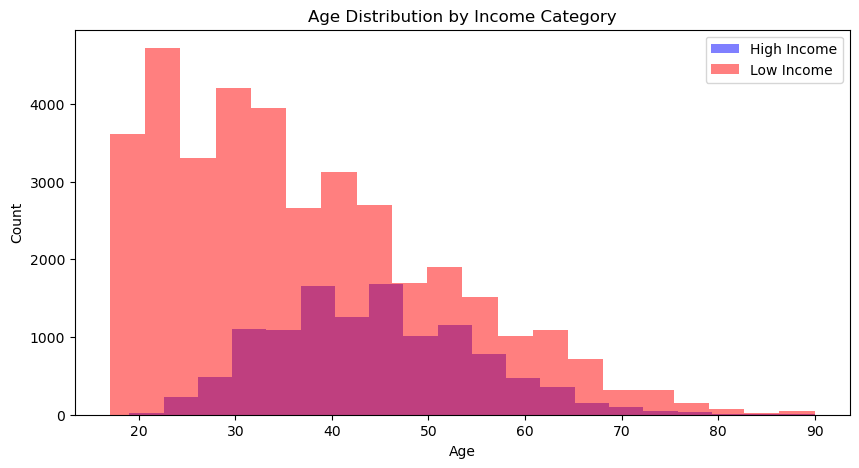

In [41]:
# Filter data for different income categories (variable names updated)
income_grthn_124k = project_df[project_df['INCOME_2024'] =='>124K']
income_lesthn_124k = project_df[project_df['INCOME_2024']== '<=124K']

# Create a histogram of age for income > 104K (using descriptive labels)
plt.figure(figsize=(10, 5))
plt.hist(income_grthn_124k['AGE'],bins=20,alpha=0.5,color='blue',label='High Income')  # Label remains the same
plt.hist(income_lesthn_124k['AGE'], bins=20, alpha=0.5, color='red',label='Low Income')  # Label remains the same
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Income Category')
plt.legend()
plt.show()


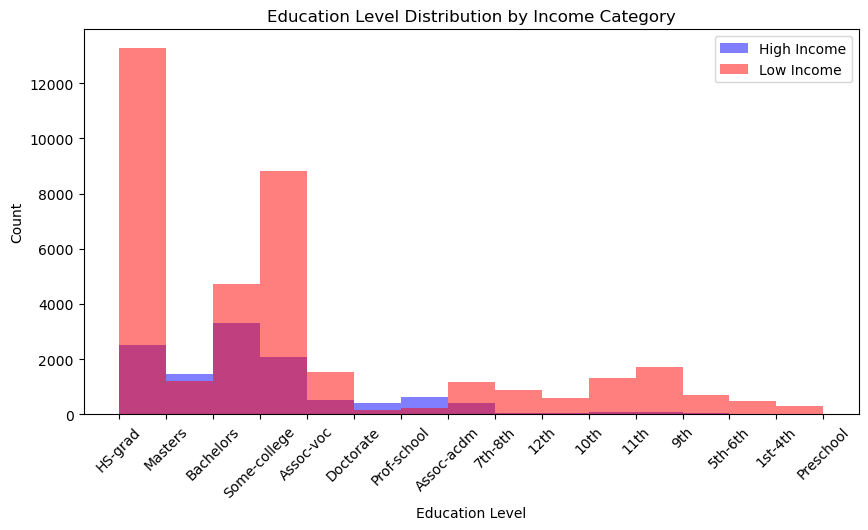

In [42]:
income_grthn_124k = project_df[project_df['INCOME_2024']=='>124K']
income_lesthn_124k = project_df[project_df['INCOME_2024']=='<=124K']

# Create a histogram of education for income > 104K (using descriptive labels)
plt.figure(figsize=(10,5))
plt.hist(income_grthn_124k['EDUCATION'],bins=15,alpha=0.5,color='blue',label='High Income')  
plt.hist(income_lesthn_124k['EDUCATION'],bins=15,alpha=0.5,color='red',label='Low Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution by Income Category')
plt.xticks(rotation=45) 
plt.legend()
plt.show()

## 7. Conversion of Categorical into Dummy

In [43]:
project_df['INCOME_2024'].unique()

['<=124K', '>124K']
Categories (2, object): ['<=124K', '>124K']

In [44]:
project_df['INCOME_2024'].str.strip()

0        <=124K
1        <=124K
2        <=124K
3        <=124K
4        <=124K
          ...  
48837    <=124K
48838    <=124K
48839    <=124K
48840    <=124K
48841     >124K
Name: INCOME_2024, Length: 48842, dtype: object

In [45]:
print(project_df.columns)

Index(['AGE', 'WORKCLASS', 'EDUCATION', 'EDUCATION_NUM', 'MARITAL_STATUS',
       'RACE', 'SEX', 'HOURS_PER_WEEK', 'INCOME_2024'],
      dtype='object')


Transform Categorical Columns to  Encoded Variables

In [46]:
# List of categorical columns to be one-hot encoded
categorical_columns = ["WORKCLASS", "MARITAL_STATUS", "SEX","RACE","EDUCATION"]

project_df = pd.get_dummies(project_df, columns=categorical_columns)

# Now, data_encoded contains the one-hot encoded categorical variables
project_df.head(10)

,AGE,EDUCATION_NUM,HOURS_PER_WEEK,INCOME_2024,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,WORKCLASS_Self-emp-not-inc,...,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college
0,39,13,40,<=124K,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,13,13,<=124K,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,38,9,40,<=124K,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,40,<=124K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,13,40,<=124K,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,37,14,40,<=124K,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,5,16,<=124K,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,52,9,45,>124K,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,31,14,50,>124K,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,42,13,40,>124K,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
print(project_df.columns)

Index(['AGE', 'EDUCATION_NUM', 'HOURS_PER_WEEK', 'INCOME_2024',
       'WORKCLASS_Federal-gov', 'WORKCLASS_Local-gov',
       'WORKCLASS_Never-worked', 'WORKCLASS_Private', 'WORKCLASS_Self-emp-inc',
       'WORKCLASS_Self-emp-not-inc', 'WORKCLASS_State-gov',
       'WORKCLASS_Without-pay', 'MARITAL_STATUS_Divorced',
       'MARITAL_STATUS_Married-AF-spouse', 'MARITAL_STATUS_Married-civ-spouse',
       'MARITAL_STATUS_Married-spouse-absent', 'MARITAL_STATUS_Never-married',
       'MARITAL_STATUS_Separated', 'MARITAL_STATUS_Widowed', 'SEX_Female',
       'SEX_Male', 'RACE_Amer-Indian-Eskimo', 'RACE_Asian-Pac-Islander',
       'RACE_Black', 'RACE_Other', 'RACE_White', 'EDUCATION_10th',
       'EDUCATION_11th', 'EDUCATION_12th', 'EDUCATION_1st-4th',
       'EDUCATION_5th-6th', 'EDUCATION_7th-8th', 'EDUCATION_9th',
       'EDUCATION_Assoc-acdm', 'EDUCATION_Assoc-voc', 'EDUCATION_Bachelors',
       'EDUCATION_Doctorate', 'EDUCATION_HS-grad', 'EDUCATION_Masters',
       'EDUCATION_Preschool',

In [48]:
project_df.to_csv('projectdata.csv', index=False)

# K Means Clustering Model

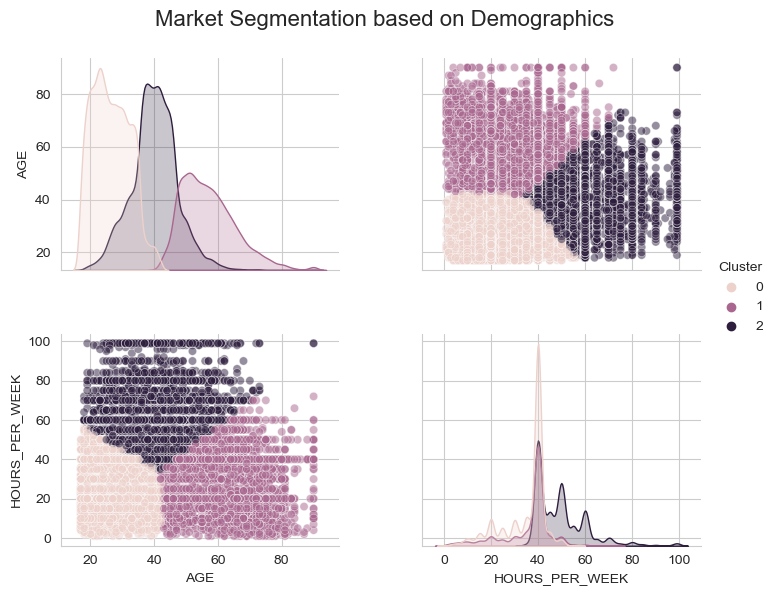

Cluster centers for demographics and education level:
         AGE  HOURS_PER_WEEK
0  26.465325       34.662275
1  56.996866       35.899112
2  39.968188       49.441051


In [49]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('projectdata.csv')
# Assuming the necessary preprocessing has been done, including encoding categorical variables
X = pd.get_dummies(df.drop(['INCOME_2024'], axis=1))

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Adding cluster information to the DataFrame
df['Cluster'] = kmeans.labels_

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Visualizing the clusters with key demographics
g = sns.pairplot(df, hue='Cluster', vars=['AGE', 'HOURS_PER_WEEK'],
                 plot_kws={'alpha':0.5}, height=3, aspect=1.2)

# Set the title with a specific size for better readability
g.fig.suptitle('Market Segmentation based on Demographics', fontsize=16)

# Adjust the title and layout for better fit and remove the overlapping
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)
plt.show()

# Display the cluster centers with the interpretation
cluster_centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster centers for demographics and education level:")
print(centers_df[['AGE', 'HOURS_PER_WEEK']])


Cluster 0: Younger crowd with standard working hours.
Cluster 1: Older crowd  with standard working hours.
Cluster 2: MIddle aged crowd with higher working hours.


If the product is budget-friendly, trendy, or tech-oriented, Cluster 0 might be your primary market. They're more likely to be responsive to digital marketing campaigns and products that align with a youthful lifestyle.
If the product offers good value for money and caters to working professionals, Cluster 3 could be your target. They might appreciate products that optimize their time and provide practical benefits to their busy lives.They may be willing to pay more for products that promise increased comfort, health benefits, or align with planning for the future.
If the product is a higher-end good or service that offers comfort, quality, and is positioned as an investment, then Cluster 1 may be the right choice. They may be willing to pay more for products that promise increased comfort, health benefits.

In [50]:
print(project_df.dtypes)

AGE                                        int64
EDUCATION_NUM                              int64
HOURS_PER_WEEK                             int64
INCOME_2024                             category
WORKCLASS_Federal-gov                      uint8
WORKCLASS_Local-gov                        uint8
WORKCLASS_Never-worked                     uint8
WORKCLASS_Private                          uint8
WORKCLASS_Self-emp-inc                     uint8
WORKCLASS_Self-emp-not-inc                 uint8
WORKCLASS_State-gov                        uint8
WORKCLASS_Without-pay                      uint8
MARITAL_STATUS_Divorced                    uint8
MARITAL_STATUS_Married-AF-spouse           uint8
MARITAL_STATUS_Married-civ-spouse          uint8
MARITAL_STATUS_Married-spouse-absent       uint8
MARITAL_STATUS_Never-married               uint8
MARITAL_STATUS_Separated                   uint8
MARITAL_STATUS_Widowed                     uint8
SEX_Female                                 uint8
SEX_Male            

Cluster centers for demographics and binary factors:
         AGE  HOURS_PER_WEEK      SEX_Male   INCOME_2024
0  36.276179       35.625009 -4.396483e-14  1.050608e-02
1  44.392938       45.917604  8.590099e-01  9.982690e-01
2  37.237580       40.702794  1.000000e+00 -1.684763e-14


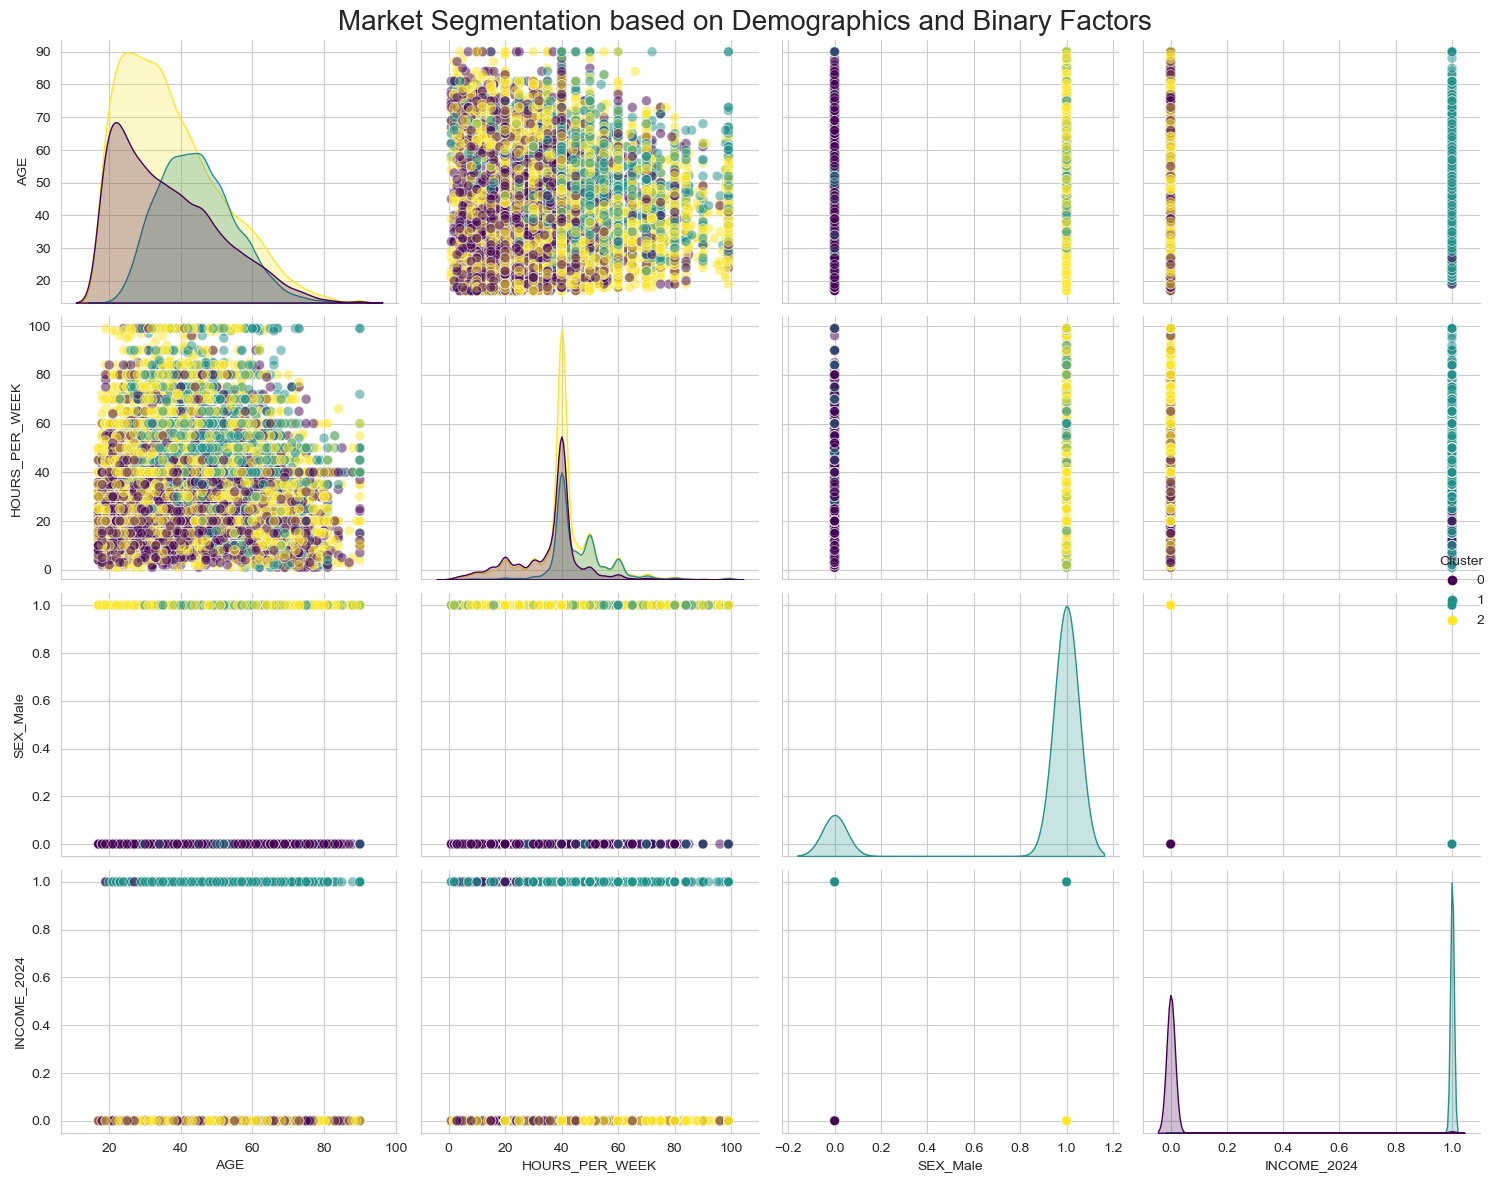

In [51]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('projectdata.csv')

# Convertsion of 'INCOME_2024' &'SEX_Male' to integers
df['INCOME_2024'] = df['INCOME_2024'].apply(lambda x: 0 if x == '<=124K' else 1)
df['SEX_Male'] = df['SEX_Male'].astype(int)
# Select features for clustering
features = ['AGE', 'HOURS_PER_WEEK','SEX_Male', 'INCOME_2024']
X = df[features]

# Standardize the features before K-means clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means Clustering with  3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)

# Adding cluster information to the DataFrame
df['Cluster'] = kmeans.labels_

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Increase figure size and aspect ratio for better visibility
pairplot_fig = sns.pairplot(df, hue='Cluster', vars=features, palette='viridis',
                            plot_kws={'alpha': 0.5, 's': 50}, height=3, aspect=1.2)

# Title with a specific size for better readability
pairplot_fig.fig.suptitle('Market Segmentation based on Demographics and Binary Factors', fontsize=20)

# Adjust the title and layout for better fit and remove the overlapping
plt.tight_layout(pad=1.0)

# cluster centers
cluster_centers = kmeans.cluster_centers_

#DataFrame from the cluster centers
centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=features)
print("Cluster centers for demographics and binary factors:")
print(centers_df)

# Show the plots
plt.show()


A simple interprtation


| Cluster | Average Age | Average Hours per Week | Predominantly Male | Above Income Threshold |
|---------|-------------|------------------------|--------------------|------------------------|
| 0       | 36          | 36                     | No (Mostly Female) | No                     |
| 1       | 44          | 46                     | Yes                | Yes                    |
| 2       | 37          | 41                     | Yes                | No                     |

The "Predominantly Male" column reflects whether the cluster is composed mainly of males based on the SEX_Male value (close to 0 for no, close to 1 for yes), and the "Above Income Threshold" column is determined by the INCOME_2024 value (close to 0 for below threshold, close to 1 for above threshold).

In [52]:
# Calculate the size of each cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)

# Determining which cluster has the most samples
largest_cluster = cluster_sizes.idxmax()
print(f"\nThe largest cluster is Cluster {largest_cluster} with {cluster_sizes[largest_cluster]} samples.")

Cluster sizes:
0    14563
1    11554
2    22725
Name: Cluster, dtype: int64

The largest cluster is Cluster 2 with 22725 samples.


### As there is a wide difference between the cluster sizes, we identified cluster 2 with higher number of samples which needs to be prioritized when considering any kind of market segmentation or business strategizing

 We need to conisder the  below mentioned average properties of the largest cluster for effective approach
 
 | Cluster | Average Age | Average Hours per Week | Predominantly Male | Above Income Threshold |
|---------|-------------|------------------------|--------------------|------------------------|
| 2       | 37          | 41                     | Yes                | No                     |   


AGE      HOURS_PER_WEEK      SEX_Male   INCOME_2024
2  37.237580       40.702794  1.000000e+00 -1.135203e-14